In [30]:
print("Notebook läuft auf dem Mac xD")


Notebook läuft auf dem Mac xD


In [31]:
import pandas as pd

df = pd.read_csv("/Users/memmo/Desktop/Sales-Analysis/Data/sales_data.csv")

In [32]:
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [19]:
df.describe()


,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [20]:
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)

In [21]:
df["Order Date"].head()

0   2017-11-08
1   2017-11-08
2   2017-06-12
3   2016-10-11
4   2016-10-11
Name: Order Date, dtype: datetime64[ns]

In [22]:
df["Order Month"] = df["Order Date"].dt.to_period("M")

In [23]:
monthly_sales = df.groupby("Order Month")["Sales"].sum()
monthly_sales.head()

Order Month
2015-01    14205.707
2015-02     4519.892
2015-03    55205.797
2015-04    27906.855
2015-05    23644.303
Freq: M, Name: Sales, dtype: float64

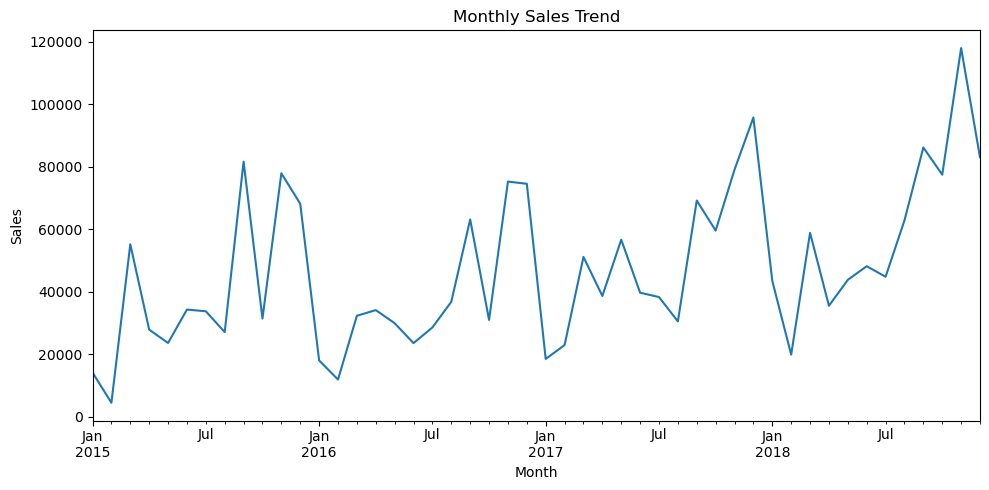

In [24]:
import matplotlib.pyplot as plt

monthly_sales.plot(kind="line", figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.tight_layout()
plt.savefig("images/sales_over_time.png")
plt.show()



In [ ]:
Insight: 

The plot-analysis shows an overall upward trend in sales with a noticeable fluctiations (seasonaly),
which indicates periods of increased customer demand.

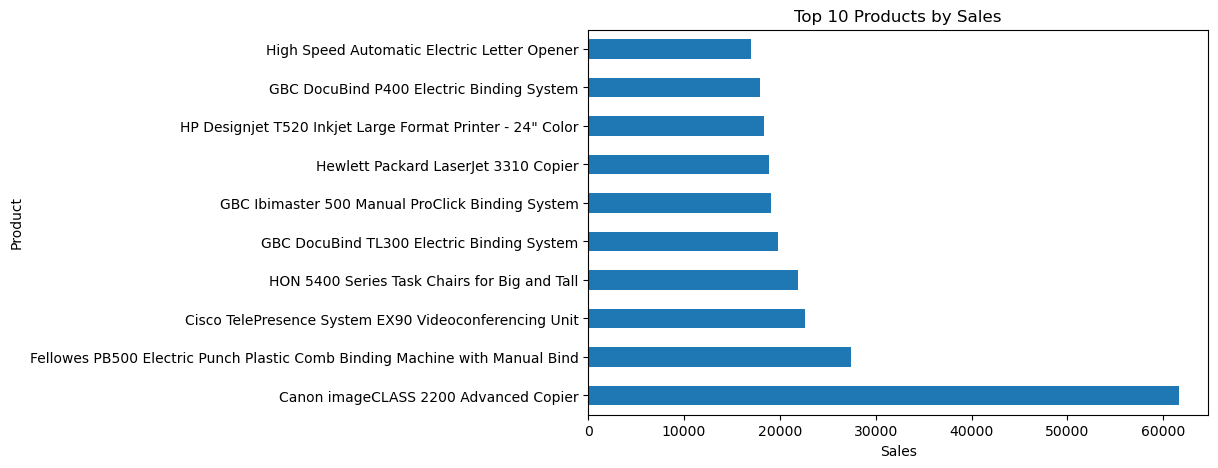

In [25]:
top_products = (
    df.groupby("Product Name")["Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products.plot(kind="barh", figsize=(8,5))
plt.title("Top 10 Products by Sales")
plt.xlabel("Sales")
plt.ylabel("Product")
plt.savefig("images/Top_Products_by_Sales.png")
plt.show()

In [11]:
Insight: 
The plot shows that the Canon imageClass 2200 Advanced Copier Sales are undeniably important, 
it should be verified as their main product and Stock-values should be raised or the company should be aware of their warehouse status.
An analysis about product sales grouped by category should be done to show which product type is the "highperformer" 

SyntaxError: invalid syntax (1266321858.py, line 1)

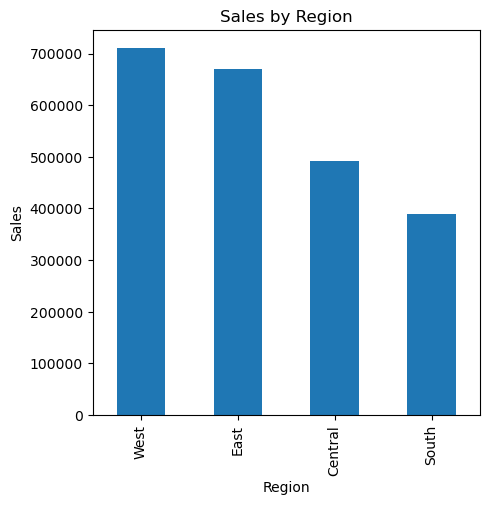

In [26]:
region_sales =(
    df.groupby("Region")["Sales"]
    .sum()
    .sort_values(ascending=False)
)

region_sales

region_sales.plot(kind="bar", figsize=(5,5))
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.savefig("images/sales_by_region.png")
plt.show()


In [13]:
Insight: 
The west and east regions generate the hightest sales,
and therefore it indicates that these two are strong markets demanding based compared to the central and south regions

SyntaxError: invalid syntax (2195250053.py, line 1)

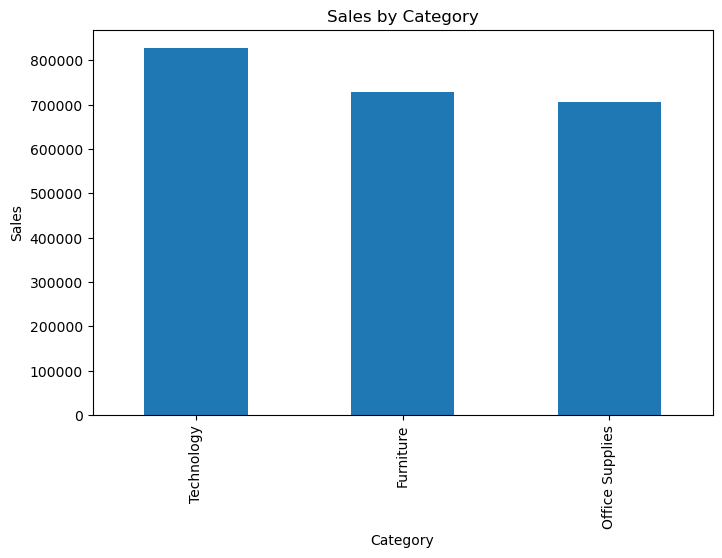

In [27]:
category_sales= (
    df.groupby("Category")["Sales"]
    .sum()
    .sort_values(ascending=False)
)
category_sales

category_sales.plot(kind="bar", figsize=(8,5))
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.savefig("images/top_categories.png")
plt.show()



In [15]:
Insight:
Technology is the top-performing category, followed by furniture and Office supplies.
What are the Sub-Categorys and Key-Products ??

SyntaxError: invalid syntax (3165644594.py, line 1)

In [28]:
sub_category_sales = (
    df.groupby("Sub-Category")["Sales"]
    .sum()
    .sort_values(ascending=False)
)

sub_category_sales.head(10)

Sub-Category
Phones         327782.4480
Chairs         322822.7310
Storage        219343.3920
Tables         202810.6280
Binders        200028.7850
Machines       189238.6310
Accessories    164186.7000
Copiers        146248.0940
Bookcases      113813.1987
Appliances     104618.4030
Name: Sales, dtype: float64

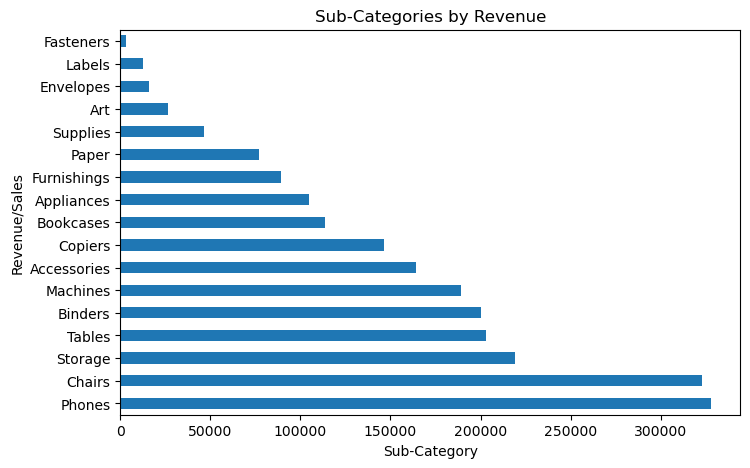

In [29]:
sub_category_sales.plot(kind="barh", figsize=(8,5))
plt.title("Sub-Categories by Revenue")
plt.xlabel("Sub-Category")
plt.ylabel("Revenue/Sales")
plt.savefig("images/top_sub_categories.png")
plt.show()


In [ ]:
Insight:
Phones and Chairs are the highest-revenue sub-categories, therefore these should be focus areas in Marketing and Advertisement (Key-Products)


In [ ]:
|| Summary of Key Insights:

° Sales Show a positiv trend over time and seasonal fluctuations
° The West and East regions are the strongest markets
° Technology is the highest-performing category
° Canon imageClass 2200 Advanced Copier is the highest-performing product by revenue
° Phones and Cahris are the Top sub-categories by revenue and should be focused on

